In [1]:
#imports
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#### Modelo y dataset a utilizar

In [2]:
RANDOM_SEED = 42

dataset = 'model/keypoint_classifier/datasetDeGestos_v4.1.csv' #dataset a utilizar

model_save_path = 'model/keypoint_classifier/datasetDeGestos_v4.1.hdf5' #ruta donde guardar

NUM_CLASSES = 5 #numero de clases

####  Cargando datasets (paramteros X y Y) para el testing y training

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1))) #se cargan la columnas del 1 al 43
# print(X_dataset[0:2])

In [4]:
X_dataset.shape

(5984, 42)

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0)) #se carga la columna 0
# print(y_dataset[0:2])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

## Estructura del modelo

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [8]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [9]:
# compilación del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training del modelo con el dataset

In [10]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
33/36 [==========================>...] - ETA: 0s - loss: 1.5761 - accuracy: 0.2360 
Epoch 00001: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 1s 10ms/step - loss: 1.5725 - accuracy: 0.2369 - val_loss: 1.4940 - val_accuracy: 0.3302
Epoch 2/1000
25/36 [===================>..........] - ETA: 0s - loss: 1.4887 - accuracy: 0.3031
Epoch 00002: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 5ms/step - loss: 1.4811 - accuracy: 0.3115 - val_loss: 1.3927 - val_accuracy: 0.4118
Epoch 3/1000
30/36 [========================>.....] - ETA: 0s - loss: 1.4212 - accuracy: 0.3422
Epoch 00003: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 1.4137 - accuracy: 0.3483 - val_loss: 1.3084 - val_accuracy: 0.5000
Epoch 4/1000
32/36 [=========================>....] - ETA: 0s - loss: 1.3578 - a

Epoch 28/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.8090 - accuracy: 0.6731
Epoch 00028: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8076 - accuracy: 0.6729 - val_loss: 0.5318 - val_accuracy: 0.8409
Epoch 29/1000
30/36 [========================>.....] - ETA: 0s - loss: 0.8156 - accuracy: 0.6742
Epoch 00029: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.8161 - accuracy: 0.6738 - val_loss: 0.5107 - val_accuracy: 0.8590
Epoch 30/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.8151 - accuracy: 0.6830
Epoch 00030: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8136 - accuracy: 0.6829 - val_loss: 0.5001 - val_accuracy: 0.8630
Epoch 31/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.8163 -

Epoch 55/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.7074 - accuracy: 0.7296
Epoch 00055: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.7299 - val_loss: 0.3761 - val_accuracy: 0.9037
Epoch 56/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.7142 - accuracy: 0.7341
Epoch 00056: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.7094 - accuracy: 0.7380 - val_loss: 0.3725 - val_accuracy: 0.9071
Epoch 57/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.7191 - accuracy: 0.7266
Epoch 00057: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.7221 - accuracy: 0.7242 - val_loss: 0.3808 - val_accuracy: 0.9017
Epoch 58/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.7166 -

Epoch 82/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.6430 - accuracy: 0.7618
Epoch 00082: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.7614 - val_loss: 0.3299 - val_accuracy: 0.9158
Epoch 83/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.6517 - accuracy: 0.7616
Epoch 00083: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.7589 - val_loss: 0.3223 - val_accuracy: 0.9178
Epoch 84/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.6643 - accuracy: 0.7507
Epoch 00084: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.7489 - val_loss: 0.3253 - val_accuracy: 0.9171
Epoch 85/1000
34/36 [===========================>..] - ETA: 0s - loss: 0.6911 -

Epoch 109/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.6424 - accuracy: 0.7566
Epoch 00109: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.7574 - val_loss: 0.3077 - val_accuracy: 0.9258
Epoch 110/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.6369 - accuracy: 0.7671
Epoch 00110: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.6345 - accuracy: 0.7692 - val_loss: 0.3042 - val_accuracy: 0.9265
Epoch 111/1000
34/36 [===========================>..] - ETA: 0s - loss: 0.6357 - accuracy: 0.7631
Epoch 00111: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.7640 - val_loss: 0.3024 - val_accuracy: 0.9238
Epoch 112/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.63

Epoch 136/1000
29/36 [=======================>......] - ETA: 0s - loss: 0.6233 - accuracy: 0.7753
Epoch 00136: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.7785 - val_loss: 0.2835 - val_accuracy: 0.9452
Epoch 137/1000
30/36 [========================>.....] - ETA: 0s - loss: 0.6396 - accuracy: 0.7646
Epoch 00137: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.7665 - val_loss: 0.2848 - val_accuracy: 0.9425
Epoch 138/1000
24/36 [===================>..........] - ETA: 0s - loss: 0.6350 - accuracy: 0.7764
Epoch 00138: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.7758 - val_loss: 0.2951 - val_accuracy: 0.9211
Epoch 139/1000
30/36 [========================>.....] - ETA: 0s - loss: 0.63

Epoch 163/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.5977 - accuracy: 0.7772
Epoch 00163: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.6011 - accuracy: 0.7767 - val_loss: 0.2687 - val_accuracy: 0.9325
Epoch 164/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.6253 - accuracy: 0.7699
Epoch 00164: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.7714 - val_loss: 0.2752 - val_accuracy: 0.9372
Epoch 165/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.6141 - accuracy: 0.7699
Epoch 00165: saving model to model/keypoint_classifier\datasetDeGestos_v4.1.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7709 - val_loss: 0.2725 - val_accuracy: 0.9265
Epoch 166/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.63

In [11]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9325


In [12]:
model = tf.keras.models.load_model(model_save_path)

In [25]:
predict_result = model.predict(np.array([X_test[1407]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.03270135 0.0364772  0.00568381 0.00116992 0.9239677 ]
4


# Validación y métricas

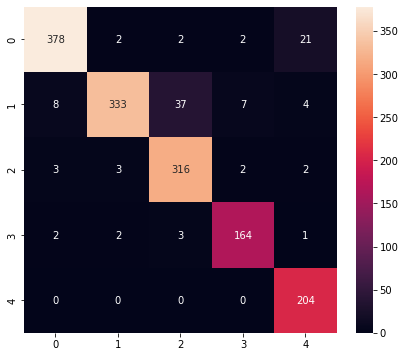

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       405
           1       0.98      0.86      0.91       389
           2       0.88      0.97      0.92       326
           3       0.94      0.95      0.95       172
           4       0.88      1.00      0.94       204

    accuracy                           0.93      1496
   macro avg       0.93      0.94      0.93      1496
weighted avg       0.94      0.93      0.93      1496



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Guardar modelo

In [24]:
model.save(model_save_path, include_optimizer=False)

In [22]:
print(X_test[1407])

[ 0.          0.         -0.08860759 -0.23206751 -0.08016878 -0.48101267
 -0.08860759 -0.7004219  -0.09704641 -0.8649789   0.3586498  -0.43881857
  0.5274262  -0.6919831   0.5864979  -0.8649789   0.62025315 -1.
  0.43459916 -0.3586498   0.4556962  -0.64978904  0.3206751  -0.6666667
  0.2278481  -0.62447256  0.44725737 -0.30379745  0.43881857 -0.5485232
  0.32911393 -0.556962    0.2658228  -0.51054853  0.443038   -0.2658228
  0.44725737 -0.45147678  0.3755274  -0.48523206  0.32489452 -0.47679326]


In [21]:
y_test[1407]

4

In [14]:
X_test.shape

(1496, 42)